In [1]:
import numpy as np
from astropy.table import Table, Column, unique
from astropy.time import Time
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from scipy.stats import binned_statistic
from xcor_tools_nicer import find_nearest as find_nearest
from xcor_tools_nicer import clock_to_mjd as clock_to_mjd
font_prop = font_manager.FontProperties(size=20)
%matplotlib inline
from astropy.modeling import fitting, powerlaws
from fast_histogram import histogram1d

In [2]:
homedir = os.path.expanduser("~")
exe_dir = os.getcwd()
obj_name = "GX_339-4"
obj_prefix = "gx339-2021"
data_dir = homedir + "/Reduced_data/%s" % obj_name
# evt_list = "%s/in/%s_evtlists.txt" % (exe_dir, obj_prefix)
# data_files = [line.strip() for line in open(evt_list)]
evt_list = data_dir+"/gx3394-1.evt"

In [3]:
rsp_matrix_file = "%s/in/nicer_v1.02rbn-5.rsp" % exe_dir
rsp_hdu = fits.open(rsp_matrix_file)
detchans = np.int(rsp_hdu['EBOUNDS'].header['DETCHANS'])
print(detchans)

156


In [4]:
evts = Table.read(evt_list, format='fits', hdu=1)
print(evts)

        TIME         RAWX RAWY PHA  ... MPU_UNDER_COUNT PI_FAST  PI   PI_RATIO 
         s           pix  pix  chan ...                   chan  chan           
-------------------- ---- ---- ---- ... --------------- ------- ---- ----------
 225258936.001859814    2    0 1043 ...              11     231  236  1.0216451
 225258936.005044490    2    2 2515 ...              13     801  815  1.0174781
 225258936.007756114    7    5 2609 ...              15     879  860 0.97838455
 225258936.008659661    3    2 3347 ...              25    1271 1234  0.9708891
 225258936.011701345    6    4  698 ...              16     144  136  0.9444444
 225258936.022694260    7    3  595 ...              19     103  102 0.99029124
 225258936.024545580    4    0  606 ...              15      94   92  0.9787234
 225258936.028926939    7    0  671 ...              13     128  120     0.9375
 225258936.035250396    7    0  940 ...              13     208  217  1.0432693
 225258936.039861798    6    0  701 ... 

In [17]:
a = (evts['PI'] >= 500) & (evts['PI'] <= 550) 
b = (evts['PI'] >= 750) & (evts['PI'] <= 800)
c = (evts['PI'] >= 620) & (evts['PI'] <= 670)
# d = (evts['PI'] >= 500) & (evts['PI'] <= 800)

a = histogram1d(evts['PI'][a], range=[500,560], bins=6)
b = histogram1d(evts['PI'][b], range=[750,810], bins=6)
c = histogram1d(evts['PI'][c], range=[620,680], bins=6)
bins_a = np.arange(500,560,10)
bins_b = np.arange(750,810,10)
bins_c = np.arange(620,680,10)

print(len(bins_a))
print(len(a))
print(bins_a)

cont = np.append(a[0:-1],b[0:-1])
x_cont = np.append(bins_a[0:-1], bins_b[0:-1])
fe = c[0:-1]
x_fe = bins_c[0:-1]

6
6
[500 510 520 530 540 550]


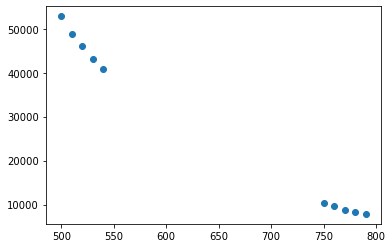

In [18]:
plt.scatter(x_cont, cont)

In [19]:
# myplfit=plfit.plfit(cont,usefortran=False)

In [20]:
for i in range(0,2):
    pl_init = powerlaws.PowerLaw1D(amplitude=50, x_0=1000., alpha=4.)
    fit_pl = fitting.LevMarLSQFitter()
    pl = fit_pl(pl_init, x_cont, cont)

In [21]:
# print(fit_pl.fit_info['message'])

In [22]:
print(pl)

Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             x_0               alpha      
    ------------------ ------------------ -----------------
    430.34888546572813 1637.3470467635188 4.069968820705873


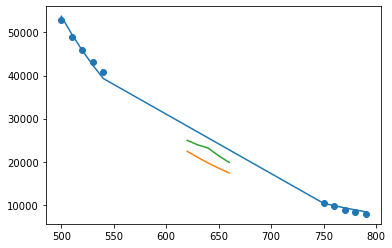

In [23]:
plt.scatter(x_cont, cont)
plt.plot(x_cont, pl(x_cont))
plt.plot(x_fe, pl(x_fe))
plt.plot(x_fe, fe)

In [24]:
for i in range(len(x_fe)):
    print(fe[i]/pl(x_fe[i]))

1.1133264195883732
1.1387915076550013
1.1756726846781262
1.1556277284181484
1.1412894934196651


In [25]:
ratio = np.average(fe/pl(x_fe))
print(ratio)

1.144941566751863
